In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [6]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']

In [7]:
data = pd.DataFrame(dataset, columns=columns) 

In [8]:
df

,age,income,gender,marital_status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [9]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

x = data.iloc[:, : -1] # exclude last column (buys)
x.head()

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1


In [10]:
y = data.iloc[:, -1] # Select only last column (buys)
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Buys, dtype: int32

In [11]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x,y)
# Age = 1, Income = 1, Gender = 0, Marital Status = 0
pred = dt_classifier.predict([[1, 1, 0, 0]])
pred[0]

1

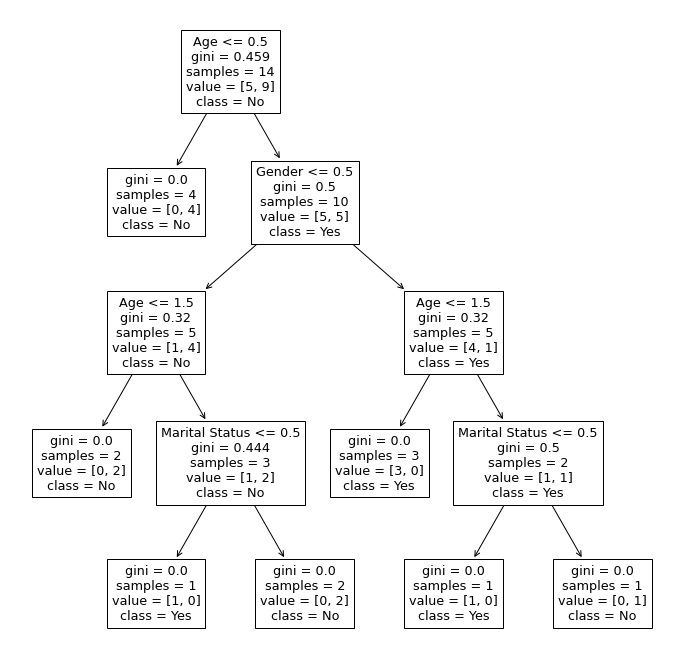

In [13]:
plt.figure(figsize=(12,12))
pt = plot_tree(
    decision_tree = dt_classifier,
    feature_names = data.columns,
    class_names = ["Yes", "No"]
)
plt.show()